In [1]:
%matplotlib inline

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# necessary append to the path to use transform
sys.path.insert(0,'faststyletransfer/src/')
from faststyletransfer.evaluate import ffwd
import transform

# Fast Style Transfer
This notebook demonstrates Fast Style Transfer written using TensorFlow. It accompanies the [Machine Learning at Berkeley](http://ml.berkeley.edu/) workshop "Making Art with Deep Learning", originally held October 10, 2017.

Interfaces with @lengstrom's [Fast Style Transfer Library](https://github.com/lengstrom/fast-style-transfer). Reproduced purely for educational purposes. See license at bottom of `faststyletransfer/README.md`.

You must have trained models available to use this notebook. @lengstrom hosts 6 pretrained models [here](https://drive.google.com/drive/folders/0B9jhaT37ydSyRk9UX0wwX3BpMzQ). 

Alternatively, you can train a new model with a new style in the `faststyletransfer` directory. Follow the `README.md` instructions on how to train 

In [3]:
def load_image(filename):
    '''
    Loads an image. 
    includes special logic for .png files which plt.imread loads to have values between 
    (0,1) and occasionally including 4 channels (4th being for alpha)
    '''
    if '.png' in filename: 
        
        img_obj = plt.imread(filename)*255
    else:
        img_obj = plt.imread(filename)
    img_obj = np.float32(img_obj)
    if len(img_obj.shape) == 3 and img_obj.shape[2] > 3:
        return img_obj[:,:,:3]
    else:
        return img_obj
def show_image(a,save=False,save_fname=None):
    ''' display the image using matplotlib'''
    plt.figure(figsize=(8,6))
    a = np.uint8(np.clip(a, 0, 255))
    plt.imshow(a)
    plt.show()
    if save:
        if save_fname is None:
            raise ValueError('save_fname must be set if save=True')
        plt.imsave(save_fname,a)

In [4]:
def ffwd_one_img(img, checkpoint_dir, device_t='/gpu:0'):
    ''''''
    img_shape = img.shape

    g = tf.Graph()
    curr_num = 0
    soft_config = tf.ConfigProto(allow_soft_placement=True)
    if 'gpu' in device_t:
        soft_config.gpu_options.allow_growth = True
        
    with g.as_default(), g.device(device_t), \
            tf.Session(config=soft_config) as sess:
        batch_shape = (1,) + img_shape
        img_placeholder = tf.placeholder(tf.float32, shape=batch_shape,
                                         name='img_placeholder')

        preds = transform.net(img_placeholder)
        saver = tf.train.Saver()
        if os.path.isdir(checkpoint_dir):
            ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)
            else:
                raise Exception("No checkpoint found...")
        else:
            saver.restore(sess, checkpoint_dir)

        _preds = sess.run(preds, feed_dict={img_placeholder:img.reshape(batch_shape)})
        
                
    return _preds[0]


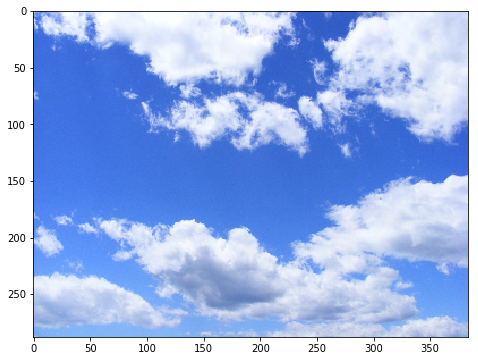

INFO:tensorflow:Restoring parameters from data/wave.ckpt


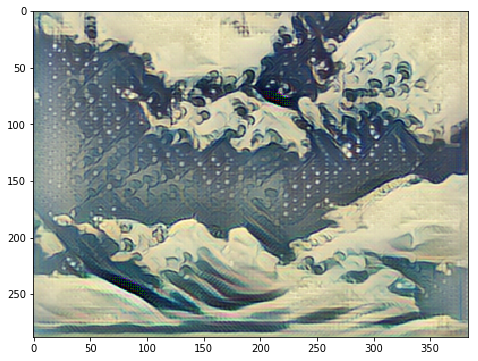

In [5]:
img = load_image('images/sky.jpg')
show_image(img)
out_img = ffwd_one_img(img, 'data/wave.ckpt')
show_image(out_img)

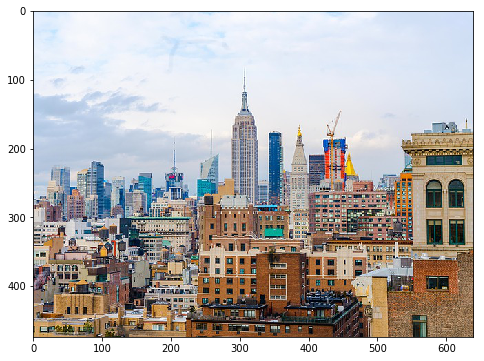

INFO:tensorflow:Restoring parameters from data/wave.ckpt


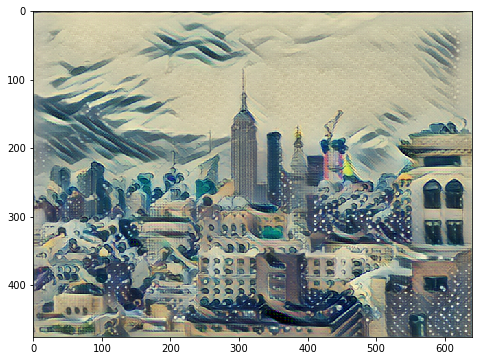

In [6]:
img = load_image('images/city-content.jpg')
show_image(img)
out_img = ffwd_one_img(img, 'data/wave.ckpt')
show_image(out_img)